In [ ]:
import nltk
nltk.download()

In [1]:
    import os
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    from nltk.corpus import stopwords
    from string import punctuation
    from nltk.tokenize import word_tokenize
    from nltk.stem import LancasterStemmer
    from string import punctuation
    from nltk.corpus import stopwords
    from nltk.tokenize import word_tokenize
    from nltk.stem import LancasterStemmer
    from nltk.stem.wordnet import WordNetLemmatizer
    import re
    import warnings
    warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('training.1600000.processed.noemoticon.csv',
                 delimiter=',', encoding='ISO-8859-1')
df.columns = ['Sentiment','id','date','query','user','text']
df.head()

,Sentiment,id,date,query,user,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [3]:
df = df[['Sentiment','text']]

In [4]:
df.columns


Index(['Sentiment', 'text'], dtype='object')

In [5]:
df.Sentiment.value_counts()


0    799996
4    248576
Name: Sentiment, dtype: int64

In [6]:
df['Sentiment'] = df['Sentiment'].replace({4:1})


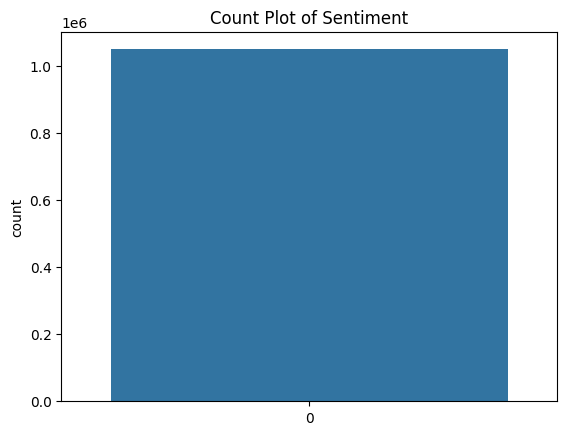

In [7]:
sns.countplot(df["Sentiment"])
plt.title("Count Plot of Sentiment")
plt.show()

In [8]:
df.isna().sum().sum()


0

In [9]:
import pandas as pd

# Assuming df contains both positive and negative sentiment samples

# Separate positive and negative sentiment samples
df_positive = df[df['Sentiment'] == 1]
df_negative = df[df['Sentiment'] == 0]

# Determine the number of positive and negative samples
num_positive_samples = len(df_positive)
num_negative_samples = len(df_negative)

# Downsample the majority class (negative sentiment)
df_majority_downsampled = df_negative.sample(n=num_positive_samples, random_state=42)

# Concatenate the downsampled majority class with the minority class (positive sentiment)
df_balanced = pd.concat([df_majority_downsampled, df_positive])

# Shuffle the balanced dataset
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)


In [10]:
print(df_balanced.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497152 entries, 0 to 497151
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Sentiment  497152 non-null  int64 
 1   text       497152 non-null  object
dtypes: int64(1), object(1)
memory usage: 7.6+ MB
None


In [11]:
print(df_balanced.head())


   Sentiment                                               text
0          1  @firsttiger Real phone? i just read your blog ...
1          0  is not allowed 2 see her Babyy during  finals....
2          1  @nicolerichie absolutely, my sister used to pr...
3          0                 I want holidays!!! Tired of exams 
4          0  @HyunINC I'll be there Sunday night up until T...


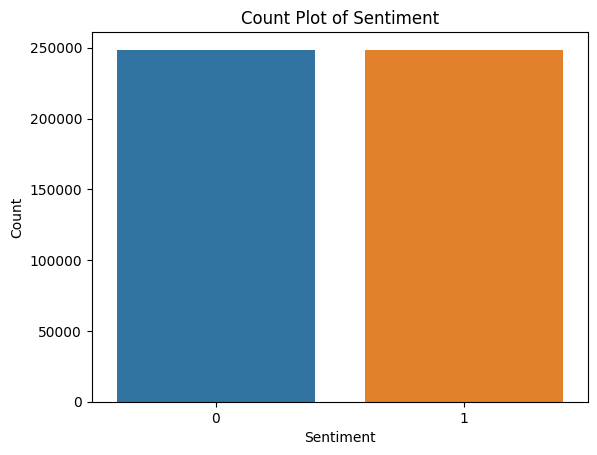

In [12]:
sns.countplot(x='Sentiment', data=df_balanced)
plt.title("Count Plot of Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

In [13]:
## remove stopwords and punctuation marks
stuff_to_be_removed = list(stopwords.words('english'))+list(punctuation)
stemmer = LancasterStemmer()

corpus = df['text'].tolist()
print(len(corpus))
print(corpus[0])

1048572
is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!


In [14]:
%%time
final_corpus = []
final_corpus_joined = []
for i in df.index:

    text = re.sub('[^a-zA-Z]', ' ', df['text'][i])
    #Convert to lowercase
    text = text.lower()
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    ##Convert to list from string
    text = text.split()

    #Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text 
            if not word in stuff_to_be_removed] 
    text1 = " ".join(text)
    final_corpus.append(text)
    final_corpus_joined.append(text1)

CPU times: total: 2min
Wall time: 2min 47s


In [15]:
data_cleaned = pd.DataFrame()
data_cleaned["text"] = final_corpus_joined
data_cleaned["Sentiment"] = df["Sentiment"].values

In [16]:
data_cleaned['Sentiment'].value_counts()


0    799996
1    248576
Name: Sentiment, dtype: int64

In [17]:
data_cleaned.head()


,text,Sentiment
0,upset update facebook texting might cry result...,0
1,kenichan dived many time ball managed save res...,0
2,whole body feel itchy like fire,0
3,nationwideclass behaving mad see,0
4,kwesidei whole crew,0


In [18]:
data_eda = pd.DataFrame()
data_eda['text'] = final_corpus
data_eda['Sentiment'] = df["Sentiment"].values
data_eda.head()

,text,Sentiment
0,"[upset, update, facebook, texting, might, cry,...",0
1,"[kenichan, dived, many, time, ball, managed, s...",0
2,"[whole, body, feel, itchy, like, fire]",0
3,"[nationwideclass, behaving, mad, see]",0
4,"[kwesidei, whole, crew]",0


In [19]:
# Storing positive data seperately
positive = data_eda[data_eda['Sentiment'] == 1]
positive_list = positive['text'].tolist()

# Storing negative data seperately

negative = data_eda[data_eda['Sentiment'] == 0]
negative_list = negative['text'].tolist()

In [20]:
positive_all = " ".join([word for sent in positive_list for word in sent ])
negative_all = " ".join([word for sent in negative_list for word in sent ])

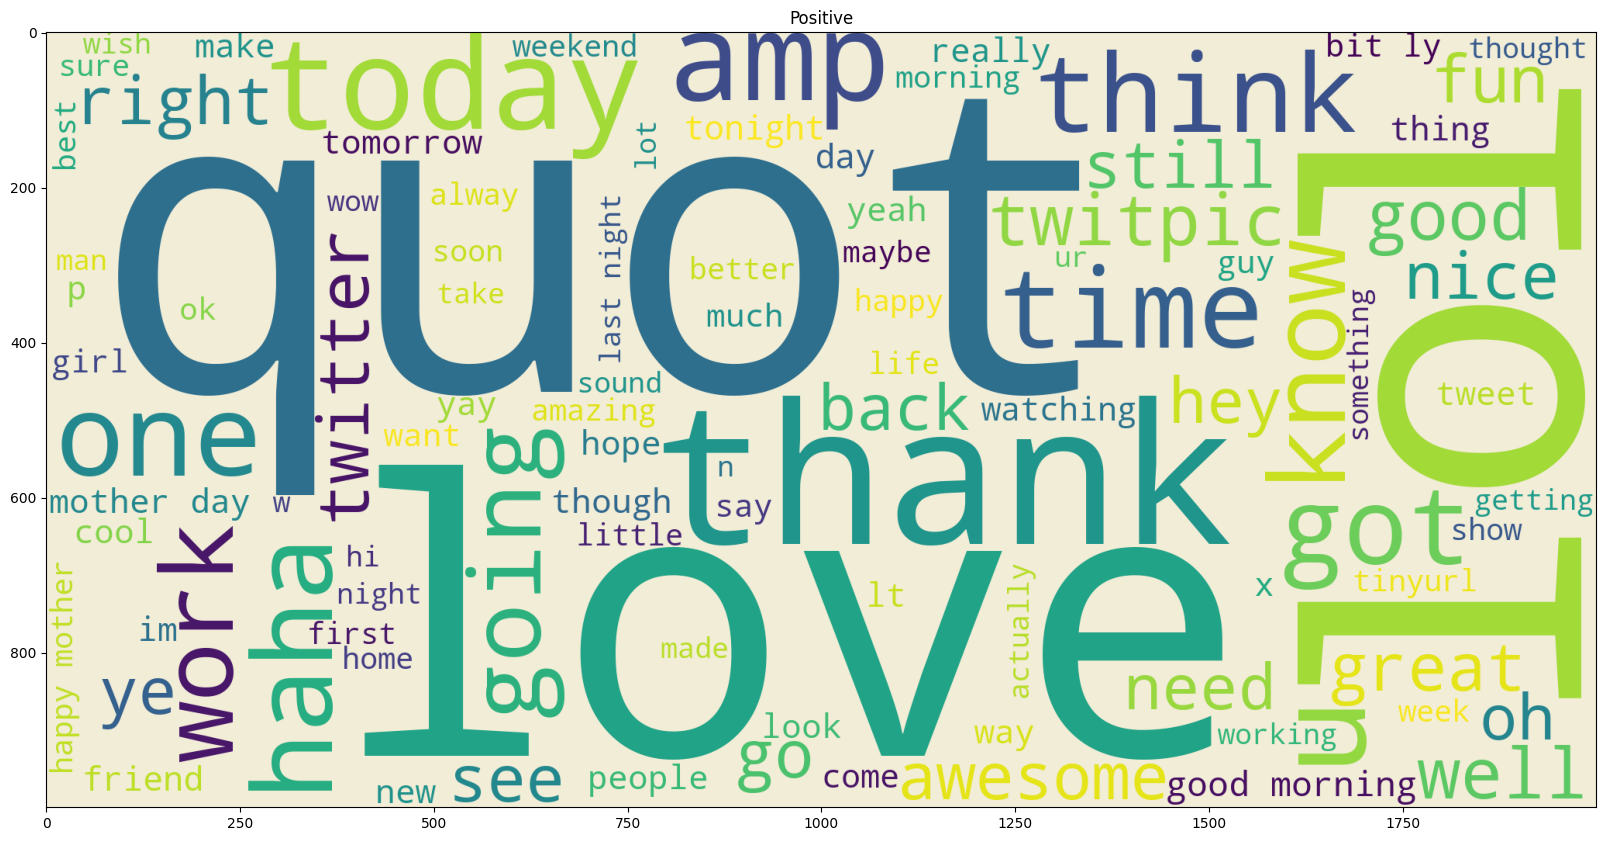

In [21]:
from wordcloud import WordCloud
WordCloud()
wordcloud = WordCloud(width=2000,
                      height=1000,
                      background_color='#F2EDD7FF',
                      max_words = 100).generate(positive_all)

plt.figure(figsize=(20,30))
plt.imshow(wordcloud)
plt.title("Positive")
plt.show()

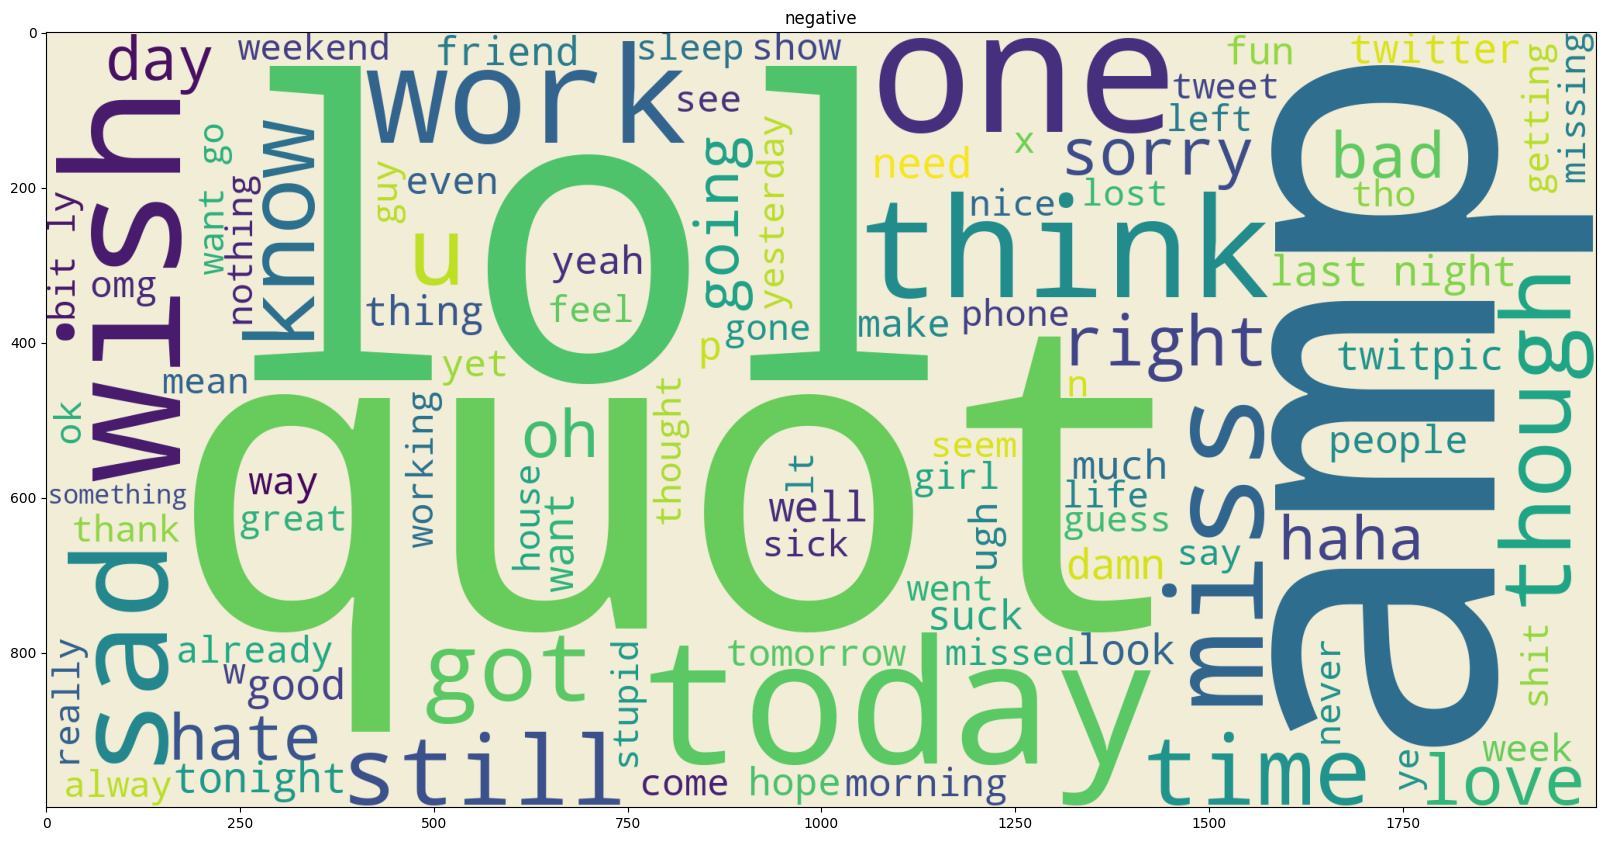

In [22]:
from wordcloud import WordCloud
WordCloud()
wordcloud = WordCloud(width=2000,
                      height=1000,
                      background_color='#F2EDD7FF',
                      max_words = 100).generate(negative_all)

plt.figure(figsize=(20,30))
plt.imshow(wordcloud)
plt.title("negative")
plt.show()

In [23]:
def get_count(data):
    dic = {}
    for i in data:
        for j in i:
            if j not in dic:
                dic[j]=1
            else:
                dic[j]+=1    
            
    return(dic)
count_corpus = get_count(positive_list)

In [24]:
count_corpus = pd.DataFrame({"word":count_corpus.keys(),"count":count_corpus.values()})
count_corpus = count_corpus.sort_values(by = "count", ascending = False)

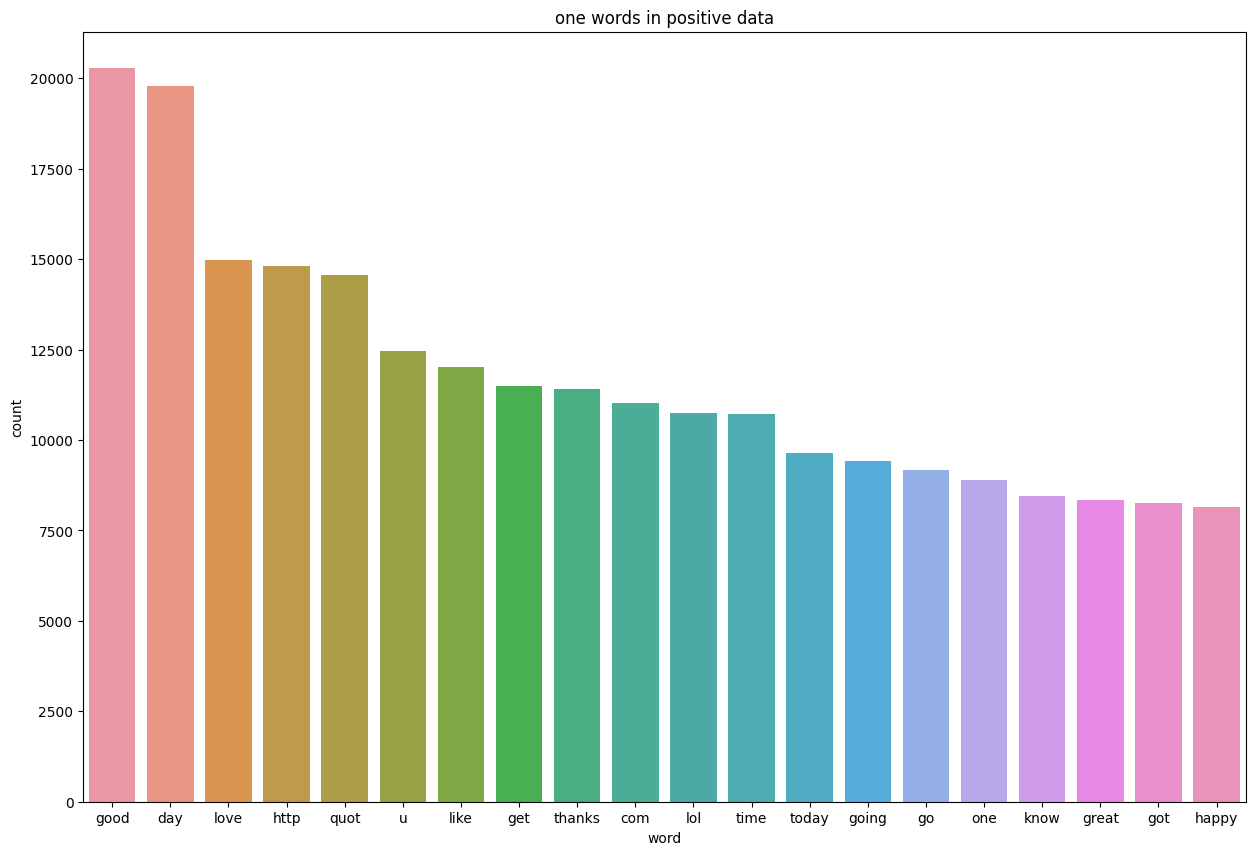

In [25]:
import seaborn as sns
plt.figure(figsize = (15,10))
sns.barplot(x = count_corpus["word"][:20], y = count_corpus["count"][:20])
plt.title('one words in positive data')
plt.show()

In [26]:
def get_count(data):
    dic = {}
    for i in data:
        for j in i:
            if j not in dic:
                dic[j]=1
            else:
                dic[j]+=1    
            
    #dic = dict(sorted(dic.items() , key = lambda x:x[1],reverse=True))
    return(dic)
count_corpus = get_count(negative_list)

In [27]:
count_corpus = pd.DataFrame({"word":count_corpus.keys(),"count":count_corpus.values()})
count_corpus = count_corpus.sort_values(by = "count", ascending = False)

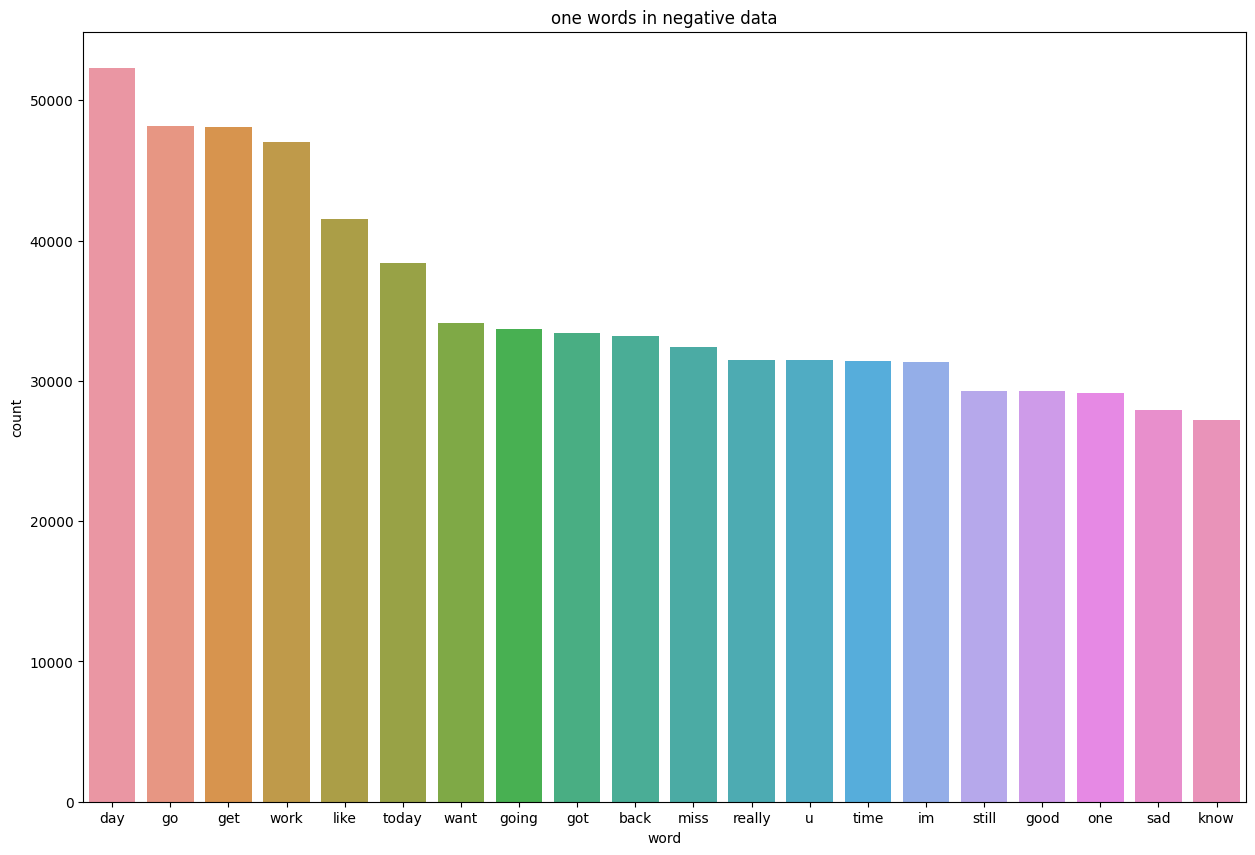

In [28]:
import seaborn as sns
plt.figure(figsize = (15,10))
sns.barplot(x = count_corpus["word"][:20], y = count_corpus["count"][:20])
plt.title('one words in negative data')
plt.show()

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust max_features based on your dataset size

# Fit and transform the text data
tfidf_matrix = tfidf_vectorizer.fit_transform(data_cleaned['text'])

# Convert the TF-IDF matrix into a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Concatenate the TF-IDF DataFrame with the target variable (Sentiment)
tfidf_df['Sentiment'] = data_cleaned['Sentiment']

# Display the TF-IDF DataFrame
print(tfidf_df.head())


    aa  aaah  aah  aaron   ab  abandoned  abc  ability  abit  able  ...  \
0  0.0   0.0  0.0    0.0  0.0        0.0  0.0      0.0   0.0   0.0  ...   
1  0.0   0.0  0.0    0.0  0.0        0.0  0.0      0.0   0.0   0.0  ...   
2  0.0   0.0  0.0    0.0  0.0        0.0  0.0      0.0   0.0   0.0  ...   
3  0.0   0.0  0.0    0.0  0.0        0.0  0.0      0.0   0.0   0.0  ...   
4  0.0   0.0  0.0    0.0  0.0        0.0  0.0      0.0   0.0   0.0  ...   

   yummy  yup  zac  zealand  zero  zoe  zombie  zone  zoo  Sentiment  
0    0.0  0.0  0.0      0.0   0.0  0.0     0.0   0.0  0.0          0  
1    0.0  0.0  0.0      0.0   0.0  0.0     0.0   0.0  0.0          0  
2    0.0  0.0  0.0      0.0   0.0  0.0     0.0   0.0  0.0          0  
3    0.0  0.0  0.0      0.0   0.0  0.0     0.0   0.0  0.0          0  
4    0.0  0.0  0.0      0.0   0.0  0.0     0.0   0.0  0.0          0  

[5 rows x 5001 columns]


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, SpatialDropout1D
from keras.utils import to_categorical

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_cleaned['text'], data_cleaned['Sentiment'], test_size=0.2, random_state=42)

# Tokenize the text data
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

# Padding sequences to ensure uniform length
max_len = max([len(x) for x in X_train])
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

# Define evaluation function
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))


# Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
print("Naive Bayes Performance:")
evaluate_model(nb_model, X_test, y_test)




Naive Bayes Performance:
Accuracy: 0.41635076174808666
Precision: 0.24128619648250133
Recall: 0.6847837047494202
F1 Score: 0.3568388418895486

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.33      0.47    160130
           1       0.24      0.68      0.36     49585

    accuracy                           0.42    209715
   macro avg       0.51      0.51      0.41    209715
weighted avg       0.65      0.42      0.44    209715



In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tqdm import tqdm

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_cleaned['text'], data_cleaned['Sentiment'], test_size=0.2, random_state=42)

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the testing data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Define the XGBoost model
xgb_model = xgb.XGBClassifier()

# Fit the model on the training data
xgb_model.fit(X_train_tfidf, y_train)

# Define evaluation function
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)

# Evaluate the performance of the XGBoost model
print("XGBoost Performance:")
evaluate_model(xgb_model, X_test_tfidf, y_test)


XGBoost Performance:
Accuracy: 0.8048017547624157
Precision: 0.7664674348388687
Recall: 0.2508621558939195
F1 Score: 0.37800467985534997


In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust max_features based on your dataset size

# Fit and transform the text data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize the XGBoost classifier
xgb_model = XGBClassifier()

# Train the model
xgb_model.fit(X_train_tfidf, y_train)

# Evaluate the performance of the model
y_pred = xgb_model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("XGBoost Performance after Text Vectorization (TF-IDF):")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


XGBoost Performance after Text Vectorization (TF-IDF):
Accuracy: 0.818367784850869
Precision: 0.7898134140191628
Recall: 0.31586165170918623
F1 Score: 0.4512569329395663


In [62]:
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier

# Initialize the XGBoost classifier
xgb_model = XGBClassifier()

# Perform cross-validation with 5 folds using all available CPU cores
cv_scores = cross_val_score(xgb_model, X_train_tfidf, y_train, cv=5, scoring='f1', n_jobs=-1)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)

# Calculate and print the mean and standard deviation of the cross-validation scores
print("Mean CV Score:", cv_scores.mean())
print("Standard Deviation of CV Scores:", cv_scores.std())


Cross-Validation Scores: [0.45427075 0.45218297        nan        nan 0.44870756]
Mean CV Score: nan
Standard Deviation of CV Scores: nan


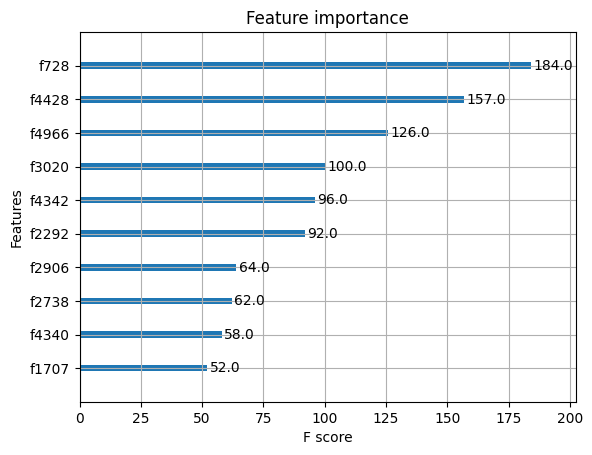

In [50]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

# Fit the XGBoost model
xgb_model.fit(X_train_tfidf, y_train)

# Plot feature importance
plot_importance(xgb_model, max_num_features=10)  # You can adjust max_num_features based on your requirements
plt.show()


In [58]:
from sklearn.metrics import confusion_matrix

# Get predictions
y_pred = xgb_model.predict(X_test_tfidf)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[155962   4168]
 [ 33923  15662]]


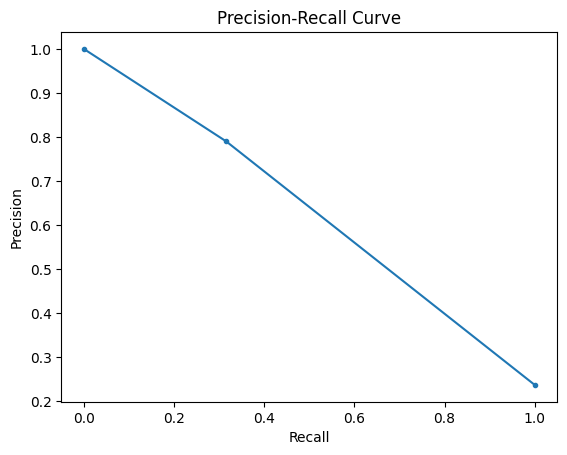

In [59]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

# Plot precision-recall curve
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


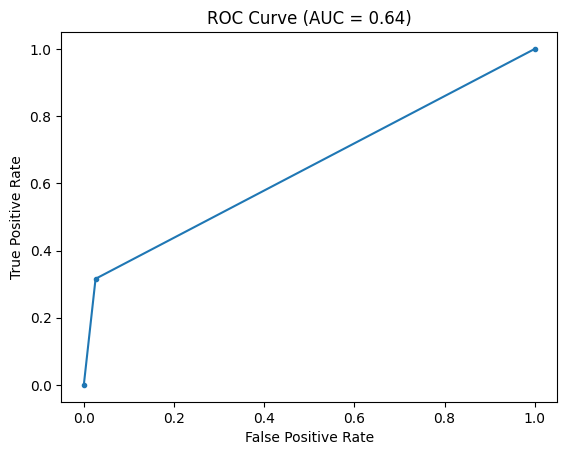

In [60]:
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (AUC = {:.2f})'.format(roc_auc))
plt.show()
